<a href="https://colab.research.google.com/github/alexandrulascu/Cresa---WPF-application/blob/master/Tema2_2_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def T_infinity(x, beta, x0):
    """
    T_infinit(x) = beta * (x - x0)^2
    """
    return beta * (x - x0)**2


In [2]:
def solve_heat_1d_Tinf(N, L, T0, TL, lam, beta, x0):
    """
    Rezolva numeric ecuatia stationara a caldurii 1D cu T_infinit(x) variabil:
        d^2 T / dx^2 - lam^2 (T - T_infinit(x)) = 0,  x in (0, L)
        T(0) = T0, T(L) = TL

    N    - numar total de puncte (inclusiv capete)
    L    - lungimea barei
    T0   - temperatura la x=0
    TL   - temperatura la x=L
    lam  - parametrul lambda (>0)
    beta - parametrul din T_infinit(x) = beta (x - x0)^2
    x0   - pozitia centrului parabolei (0 < x0 < L)

    Returneaza:
        x        - vectorul nodurilor
        T        - solutia numerica in aceste noduri
        T_infvec - valorile T_infinit(x) in aceste noduri
    """
    if N < 3:
        raise ValueError("N trebuie sa fie cel putin 3 (2 capete + 1 interior).")

    x = np.linspace(0.0, L, N)
    h = x[1] - x[0]

    T_infvec = T_infinity(x, beta, x0)

    n_unknowns = N - 2

    A = np.zeros((n_unknowns, n_unknowns))
    b = np.zeros(n_unknowns)

    alpha = 2.0 + (lam**2) * (h**2)

    for i in range(n_unknowns):
        A[i, i] = alpha

        if i > 0:
            A[i, i-1] = -1.0

        if i < n_unknowns - 1:
            A[i, i+1] = -1.0

        j = i + 1
        b[i] = (lam**2) * (h**2) * T_infvec[j]

    b[0] += T0
    b[-1] += TL

    T_interior = np.linalg.solve(A, b)

    T = np.zeros(N)
    T[0] = T0
    T[-1] = TL
    T[1:-1] = T_interior

    return x, T, T_infvec


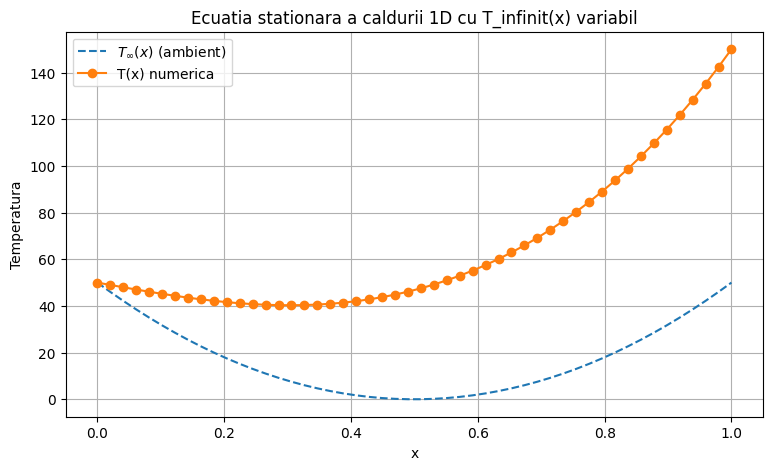

In [3]:
L = 1.0
T0 = 50.0
TL = 150.0
lam = 3.0
beta = 200.0
x0 = 0.5
N = 50

x, T_num, T_infvec = solve_heat_1d_Tinf(N, L, T0, TL, lam, beta, x0)

plt.figure(figsize=(9, 5))
plt.plot(x, T_infvec, label=r'$T_{\infty}(x)$ (ambient)', linestyle='--')
plt.plot(x, T_num, 'o-', label='T(x) numerica')
plt.xlabel('x')
plt.ylabel('Temperatura')
plt.title('Ecuatia stationara a caldurii 1D cu T_infinit(x) variabil')
plt.legend()
plt.grid(True)
plt.show()


N =  10, eroare max fata de referinta = 5.485e-02
N =  20, eroare max fata de referinta = 1.251e-02
N =  40, eroare max fata de referinta = 2.806e-03
N =  80, eroare max fata de referinta = 6.608e-04
N = 160, eroare max fata de referinta = 6.881e-04


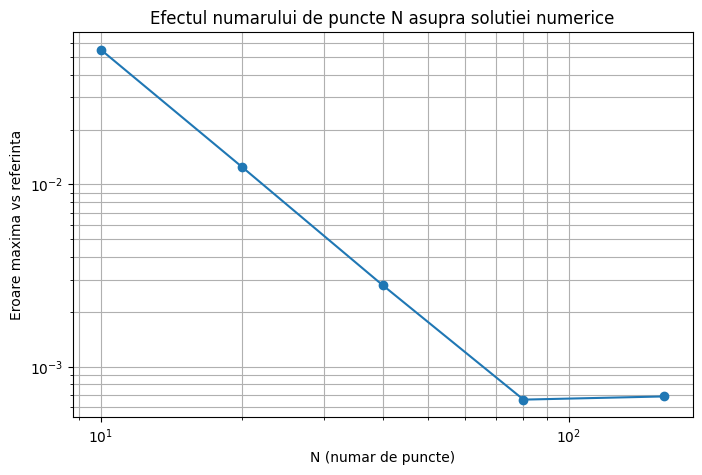

In [4]:
L = 1.0
T0 = 50.0
TL = 150.0
lam = 3.0
beta = 200.0
x0 = 0.5

N_ref = 400
x_ref, T_ref, T_inf_ref = solve_heat_1d_Tinf(N_ref, L, T0, TL, lam, beta, x0)

def interp_to_grid(x_src, y_src, x_target):
    return np.interp(x_target, x_src, y_src)

N_values = [10, 20, 40, 80, 160]
errors = []

for N in N_values:
    xN, TN, _ = solve_heat_1d_Tinf(N, L, T0, TL, lam, beta, x0)
    T_ref_on_N = interp_to_grid(x_ref, T_ref, xN)
    error_max = np.max(np.abs(TN - T_ref_on_N))
    errors.append(error_max)
    print(f"N = {N:3d}, eroare max fata de referinta = {error_max:.3e}")

plt.figure(figsize=(8, 5))
plt.loglog(N_values, errors, 'o-')
plt.xlabel('N (numar de puncte)')
plt.ylabel('Eroare maxima vs referinta')
plt.title('Efectul numarului de puncte N asupra solutiei numerice')
plt.grid(True, which='both')
plt.show()
